# Machine Learning and Statisitics 2020

## Project 2020

### Student ID: Claire Nolan G00376464

## Background Information

The aim of this project is to use a dataset (powerproduction.csv) to create a model which makes predictions about the wind turbine power output (y) based in the wind speed input (x).

A wind turbine produces electricity by using the kinetic or moving energy of wind to create motion. The amount of electricity that a single turbine is able to produce depends on its size, the wind speed and the efficiency with which that specifically designed turbine is able to convert wind energy to electrical energy. The wind turbine will start operating at wind speeds of four to five metres per second. At speeds of 15 metres per second, the wind turbine will reach its maximum output. If the wind speeds reach 25 metres per second or greater, the turbine will be shut down to avoid damage to the turbine occurring. Therefore Wind energy is not a particularly reliable source of energy.

![https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.energy.gov%2Fsites%2Fprod%2Ffiles%2Fstyles%2Fborealis_photo_gallery_large_respondmedium%2Fpublic%2F2017%2F06%2Ff34%2Fwind_graphic.jpg%3Fitok%3DhwAc2zRU&imgrefurl=https%3A%2F%2Fwww.energy.gov%2Feere%2Farticles%2Fhow-do-wind-turbines-survive-severe-storms&tbnid=8YmI_ecoW43E0M&vet=12ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ..i&docid=iYnKIcxc0OBeFM&w=525&h=276&q=wind%20turbine%20speed&ved=2ahUKEwibi4jqy4DuAhUeZhUIHeDoA5wQMygAegUIARCiAQ](attachment:image.png)


https://en.wikipedia.org/wiki/Wind_turbine
https://enerpower.ie/portfolio/wind-turbine-faq-ireland/
https://www.bordnamona.ie/company/our-businesses/powergen/frequently-asked-questions/
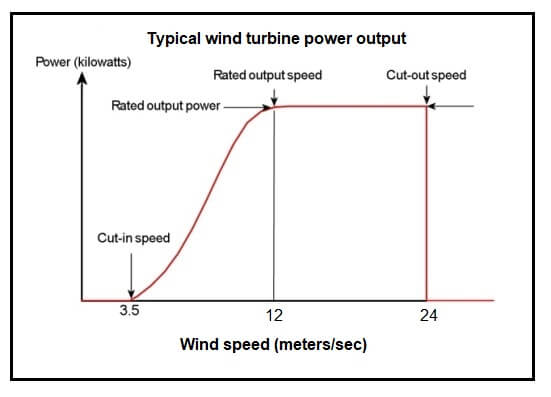

<br>

## 1. Import required libraries
***

Keras:
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. TensorFlow 2.0 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming.

Pandas:
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

Numpy:
Numpy creates random data. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

Matplotlib:
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

Seaborn:
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

import seaborn as sns



# Import required libraries
import sklearn as sk
import sklearn.cluster as skcl

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
import sklearn.neural_network as sknn

# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor


In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<br>

## 2. Simple Investigation of the dataset
***

This is performed so I can get an understanding of the data and the shape of the line as there is not much detail about the dataset eg units of measurement, the timeframe the data is taken, is the data from one or many turbines, location etc.

There is only one input, speed, and one output, power.

In [3]:
# Import the dataset

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

df.head(10) # displays the first 10 rows of the data set as a table/array



,speed,power
0,0.000,0.00
1,0.125,0.00
2,0.150,0.00
3,0.225,0.00
4,0.275,0.00
5,0.325,4.33
6,0.400,5.19
7,0.450,3.83
8,0.501,1.05
9,0.526,5.55


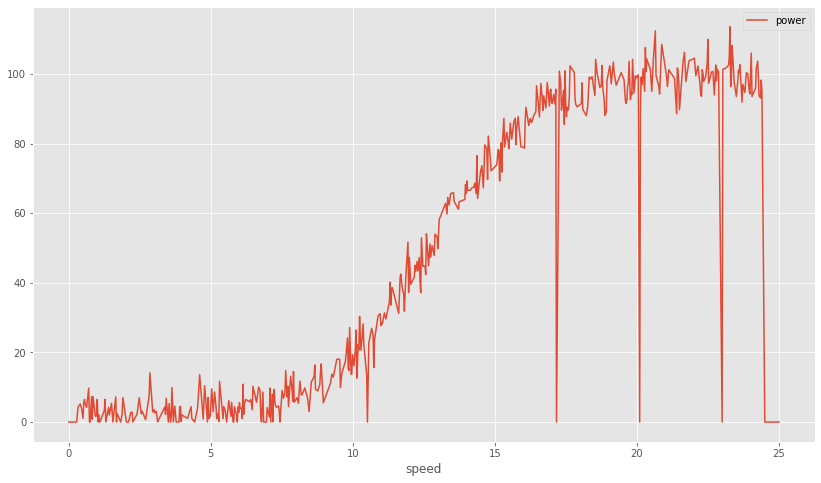

In [4]:
df.plot(x="speed", y="power")

X = df['speed']
y = df['power']

plt.show()

In [5]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014860
std,7.224991,41.614565
min,0.000000,0.000000
25%,6.324750,5.287500
50%,12.550500,41.645000
75%,18.775250,93.540000
max,25.000000,113.560000


From the scatterplot above I can see the data is not linear. There also 500 data points. The graph also follows the structure of the picture above ie the wind turbine begins to output power when the speed hits approximately 8 and stops when the speed hits approximately 24. This may mean that any intercept should be set for 8 instead of 0 to give a more accurate linear regression. This is a safety feature to prevent damage to the turbine at high speeds. Note there are some data points where the speed is zero. This may mean the turbines were turned off for maintenance, protection etc.

<br>

## 3. The model

***



## 3.1 Load the data and split into testing and training data
***

Dataset loaded. Now data is split into test data and training data

<em>df</em> = dataset imported above

<em> test_size:</em>represents the proportion of the dataset to include in the test split. Default is set to None and the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

<em>train_size:</em> represents the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

<em>random_state: </em> Controls the shuffling applied to the data before applying the split. 

<em>shuffle: </em> default=True whether to shuffle the data before splitting. 

<em>stratify: </em> array-like, default=None

Returns two split lists containing train-test split of inputs.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split


In [6]:
# Option 1
sk.model_selection.train_test_split(df, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

[      speed  power
 124   6.231   6.49
 13    0.676   7.97
 9     0.526   5.55
 252  12.613  51.47
 486  24.299  93.69
 ..      ...    ...
 210  10.661  26.93
 288  14.715  78.50
 37    1.677   0.00
 441  22.272  93.57
 422  21.071  96.35
 
 [375 rows x 2 columns],
       speed  power
 407  20.170  96.96
 16    0.751   0.00
 266  13.438  65.61
 359  18.043  91.49
 108   5.706   1.63
 ..      ...    ...
 391  19.620  91.50
 86    4.605  13.59
 276  14.139  66.60
 338  17.117  91.27
 182   9.309  12.88
 
 [125 rows x 2 columns]]

In [7]:
#Option 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train

y_train

X_test

y_test

361     89.79
73       0.00
374    102.44
155     10.30
104      3.20
        ...  
110      0.00
318     85.17
428     97.67
29       3.37
437     99.46
Name: power, Length: 165, dtype: float64

<br>

## 3.2 sklearn regression - linear and sigmoid

In [8]:
X = df['speed']
y = df['power']

In [9]:
#Best fit straight line
X_avg = np.mean(X)
y_avg = np.mean(y)

X_zero = X - X_avg
y_zero = y - y_avg

m = np.sum(X_zero * y_zero)/(np.sum(X_zero * X_zero))
c = y_avg - m * X_avg

In [10]:
#Best fit sigmoid curve
#https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python
from scipy.optimize import curve_fit

def sigmoid(X, L, X0, k, b):
    s = L / (1 + np.exp(-k*(X-X0)))+b
    return(s)

p0 = [max(y), np.median(X), 1, min(y)] #mandatory initial guess

popt, pcov = curve_fit(sigmoid, X, y, p0, method='dogbox')

#plt.plot(popt, pcov) #check visual

In [11]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, X, y)
popt


C:\Users\Claire Laptop\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([-48.11108629, 206.84549505,  48.11108217])

In [12]:
#https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

#y_data

X = df['speed']
y = df['power']

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = curve_fit(test_func, X, y, p0=[2,2])


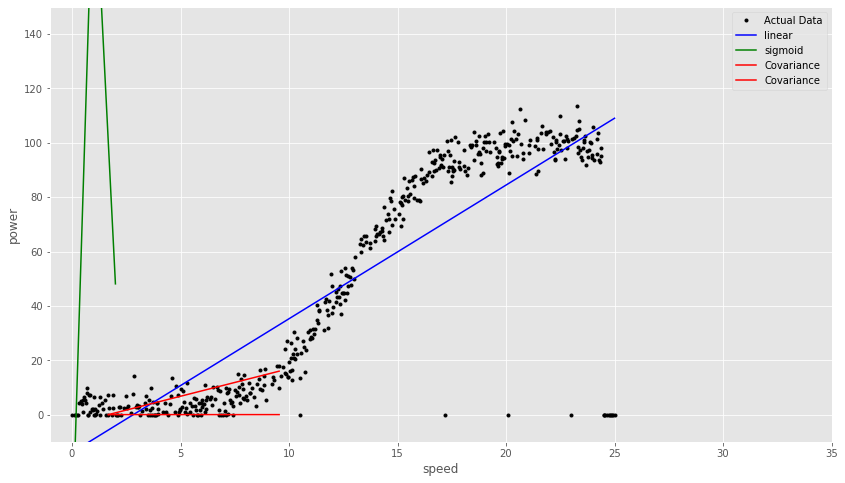

In [13]:
#Best fit straight line
plt.plot(X, y,'k.', label="Actual Data")

plt.plot(X, m * X + c, 'b-', label="linear")#plot best fit straight line

plt.plot(popt, 'g-', label="sigmoid")
plt.plot(params, params_covariance, 'r-', label="Covariance")

plt.xlabel('speed')
plt.ylabel('power')

plt.xlim(-1,35)
plt.ylim(-10,150)

plt.legend()
plt.show()

explain above

## 3.3 Keras NN Linear

<em>Using Keras</em>

Load Data.
Define Keras Model.
Compile Keras Model.
Fit Keras Model.
Evaluate Keras Model.
Tie It All Together.
Make Predictions

In [14]:
#Best fit straight line
X_avg = np.mean(X)
y_avg = np.mean(y)

X_zero = X - X_avg
y_zero = y - y_avg

m = np.sum(X_zero * y_zero)/(np.sum(X_zero * X_zero))
c = y_avg - m * X_avg

# use lambda notion: https://www.w3schools.com/python/python_lambda.asp

# Simple linear equation.
f = lambda x: m * X + c

In [15]:
# Create a neural network with one neuron.
model = kr.models.Sequential()
#single neuron
# model is linear
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
# adam is used as the optimiser as it is adaptive
model.compile('adam', loss='mean_squared_error')

In [16]:
# Train the neural network on our training data.
#fit training dataset to neural network, pass x values in to neural network and determine what y would be. See if these y values match the model y-values
# epoch means that every single xvalue goes throught the neural network 500 times. Everytime it goes through, the NN tries to improve the prediction
# can see the improvement in the epoch log below from 1 to 500 to decrease the loss. Want a small loss value ie miniscule but may depend on the dataset
# if peters out at a high level may need to change the model or check out the inputs as they may need preprocessing
# adam (learning rate) 
model.fit(X_train, y_train, epochs=500)
# 500 epochs can take time

#X_train, X_test, y_train, y_test

Epoch 1/500
11/11 [==============================] - 0s 698us/step - loss: 2396.2214
Epoch 2/500
11/11 [==============================] - 0s 802us/step - loss: 2517.3664
Epoch 3/500
11/11 [==============================] - 0s 598us/step - loss: 2576.1130
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 2422.6355
Epoch 5/500
11/11 [==============================] - 0s 698us/step - loss: 2427.4177
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 2445.5219
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 2336.8813
Epoch 8/500
11/11 [==============================] - 0s 699us/step - loss: 2411.2005
Epoch 9/500
11/11 [==============================] - 0s 796us/step - loss: 2095.5313
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 2425.9722
Epoch 11/500
11/11 [==============================] - 0s 900us/step - loss: 2291.2790
Epoch 12/500
11/11 [==============================] - 0s 698us/step - l

11/11 [==============================] - 0s 798us/step - loss: 1361.2833
Epoch 96/500
11/11 [==============================] - 0s 902us/step - loss: 1388.7866
Epoch 97/500
11/11 [==============================] - 0s 798us/step - loss: 1542.7174
Epoch 98/500
11/11 [==============================] - 0s 692us/step - loss: 1452.5251
Epoch 99/500
11/11 [==============================] - 0s 897us/step - loss: 1375.6404
Epoch 100/500
11/11 [==============================] - 0s 698us/step - loss: 1348.7497
Epoch 101/500
11/11 [==============================] - 0s 795us/step - loss: 1426.0562
Epoch 102/500
11/11 [==============================] - 0s 798us/step - loss: 1464.0999
Epoch 103/500
11/11 [==============================] - 0s 705us/step - loss: 1368.0897
Epoch 104/500
11/11 [==============================] - 0s 794us/step - loss: 1355.7243
Epoch 105/500
11/11 [==============================] - 0s 702us/step - loss: 1376.0834
Epoch 106/500
11/11 [==============================] - 0s 798

11/11 [==============================] - 0s 798us/step - loss: 901.6310
Epoch 190/500
11/11 [==============================] - 0s 798us/step - loss: 897.0958
Epoch 191/500
11/11 [==============================] - 0s 801us/step - loss: 870.8032
Epoch 192/500
11/11 [==============================] - 0s 897us/step - loss: 805.4027
Epoch 193/500
11/11 [==============================] - 0s 897us/step - loss: 868.7970
Epoch 194/500
11/11 [==============================] - 0s 790us/step - loss: 801.8100
Epoch 195/500
11/11 [==============================] - 0s 794us/step - loss: 819.5912
Epoch 196/500
11/11 [==============================] - 0s 861us/step - loss: 793.0994
Epoch 197/500
11/11 [==============================] - 0s 882us/step - loss: 863.2620
Epoch 198/500
11/11 [==============================] - 0s 793us/step - loss: 781.4678
Epoch 199/500
11/11 [==============================] - 0s 734us/step - loss: 794.8515
Epoch 200/500
11/11 [==============================] - 0s 795us/step

11/11 [==============================] - 0s 698us/step - loss: 609.3938
Epoch 284/500
11/11 [==============================] - 0s 861us/step - loss: 601.4001
Epoch 285/500
11/11 [==============================] - 0s 801us/step - loss: 618.7660
Epoch 286/500
11/11 [==============================] - 0s 800us/step - loss: 546.1297
Epoch 287/500
11/11 [==============================] - 0s 889us/step - loss: 592.1155
Epoch 288/500
11/11 [==============================] - 0s 701us/step - loss: 604.6985
Epoch 289/500
11/11 [==============================] - 0s 757us/step - loss: 693.9175
Epoch 290/500
11/11 [==============================] - 0s 895us/step - loss: 570.3689
Epoch 291/500
11/11 [==============================] - 0s 794us/step - loss: 595.1835
Epoch 292/500
11/11 [==============================] - 0s 798us/step - loss: 546.2982
Epoch 293/500
11/11 [==============================] - 0s 798us/step - loss: 627.6500
Epoch 294/500
11/11 [==============================] - 0s 851us/step

11/11 [==============================] - 0s 798us/step - loss: 536.1669
Epoch 378/500
11/11 [==============================] - 0s 788us/step - loss: 500.5251
Epoch 379/500
11/11 [==============================] - 0s 894us/step - loss: 521.6632
Epoch 380/500
11/11 [==============================] - 0s 898us/step - loss: 523.7633
Epoch 381/500
11/11 [==============================] - 0s 698us/step - loss: 487.2440
Epoch 382/500
11/11 [==============================] - 0s 811us/step - loss: 463.1366
Epoch 383/500
11/11 [==============================] - 0s 744us/step - loss: 532.1630
Epoch 384/500
11/11 [==============================] - 0s 726us/step - loss: 475.0272
Epoch 385/500
11/11 [==============================] - 0s 846us/step - loss: 511.5797
Epoch 386/500
11/11 [==============================] - 0s 774us/step - loss: 484.2795
Epoch 387/500
11/11 [==============================] - 0s 834us/step - loss: 480.7292
Epoch 388/500
11/11 [==============================] - 0s 698us/step

11/11 [==============================] - 0s 802us/step - loss: 433.8857
Epoch 473/500
11/11 [==============================] - 0s 698us/step - loss: 491.0191
Epoch 474/500
11/11 [==============================] - 0s 807us/step - loss: 485.3215
Epoch 475/500
11/11 [==============================] - ETA: 0s - loss: 809.942 - 0s 919us/step - loss: 509.2965
Epoch 476/500
11/11 [==============================] - 0s 785us/step - loss: 471.1180
Epoch 477/500
11/11 [==============================] - 0s 836us/step - loss: 537.6833
Epoch 478/500
11/11 [==============================] - 0s 798us/step - loss: 490.6071
Epoch 479/500
11/11 [==============================] - 0s 728us/step - loss: 442.6753
Epoch 480/500
11/11 [==============================] - ETA: 0s - loss: 387.845 - 0s 798us/step - loss: 451.4125
Epoch 481/500
11/11 [==============================] - 0s 690us/step - loss: 454.2495
Epoch 482/500
11/11 [==============================] - 0s 843us/step - loss: 450.7181
Epoch 483/500
11

In [17]:
# Take four hand-picked values and see their predictions.
# see if they compare to data faked above
model.predict([10.0,15.0,20.0,25.0])

array([[ 41.10429],
       [ 60.77701],
       [ 80.44973],
       [100.12245]], dtype=float32)

In [18]:
# See what f says they are.
#comparable to NN prediction in cell above
# NN knows nothing about the function but has learned how to calculate the function
np.array([[f(i)] for i in [10.0,15.0,20.0,25.0]])

array([[[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]],

       [[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]],

       [[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]],

       [[-13.89953856, -13.28483998, -13.16190026, ..., 108.42547961,
         108.79429876, 109.0401782 ]]])

(-10.0, 150.0)

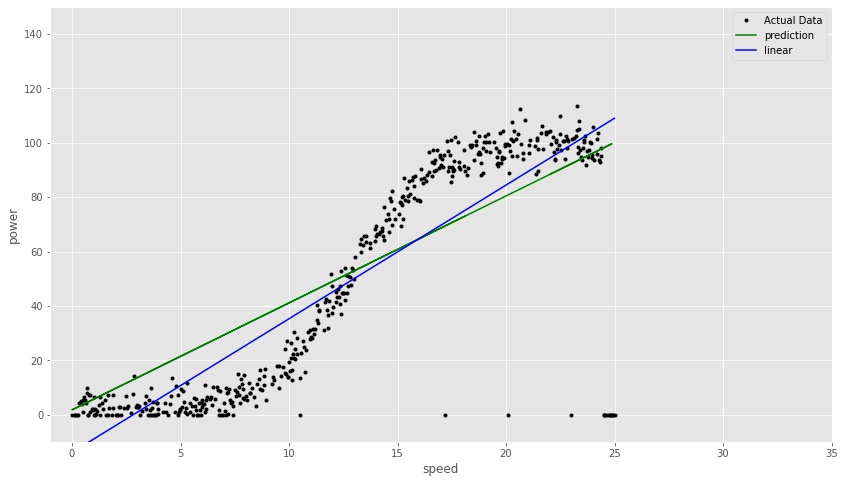

In [19]:
# Let's plot our predictions of the x values we trained on
# ie 
plt.plot(X, y,'k.', label="Actual Data")

plt.plot(X_test, model.predict(X_test), 'g-', label='prediction') #ie after training

plt.plot(X, m * X + c, 'b-', label="linear")#plot best fit straight line
plt.legend();

plt.xlabel('speed')
plt.ylabel('power')

plt.xlim(-1,35)
plt.ylim(-10,150)


In [20]:
# Evaluate the neural network on the test data.
model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 798us/step - loss: 584.8982


584.898193359375

Not a great model

<br>

## 3.4 Keras Neural Neurons

***

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 

X = df['speed']
y = df['power']

In [25]:
# Create a new neural network.
m = kr.models.Sequential()
# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones',bias_initializer='zeros'))
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [26]:
# Create some input values.
#x = np.arange(-10.0, 10.1, 1.0)
# Run each x value through the neural network.
y = m.predict(X)

In [29]:
# Have a look at x.
X

0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
        ...  
495    24.775
496    24.850
497    24.875
498    24.950
499    25.000
Name: speed, Length: 500, dtype: float64

In [30]:
# Here are the corresponding outputs.
y

array([[ 0.   ],
       [ 0.125],
       [ 0.15 ],
       [ 0.225],
       [ 0.275],
       [ 0.325],
       [ 0.4  ],
       [ 0.45 ],
       [ 0.501],
       [ 0.526],
       [ 0.551],
       [ 0.576],
       [ 0.626],
       [ 0.676],
       [ 0.701],
       [ 0.726],
       [ 0.751],
       [ 0.801],
       [ 0.826],
       [ 0.851],
       [ 0.926],
       [ 0.951],
       [ 0.976],
       [ 1.001],
       [ 1.026],
       [ 1.051],
       [ 1.076],
       [ 1.101],
       [ 1.151],
       [ 1.251],
       [ 1.276],
       [ 1.301],
       [ 1.401],
       [ 1.426],
       [ 1.502],
       [ 1.552],
       [ 1.652],
       [ 1.677],
       [ 1.702],
       [ 1.827],
       [ 1.877],
       [ 1.902],
       [ 2.027],
       [ 2.077],
       [ 2.102],
       [ 2.177],
       [ 2.227],
       [ 2.252],
       [ 2.402],
       [ 2.477],
       [ 2.553],
       [ 2.578],
       [ 2.703],
       [ 2.828],
       [ 2.853],
       [ 2.953],
       [ 3.003],
       [ 3.028],
       [ 3.053

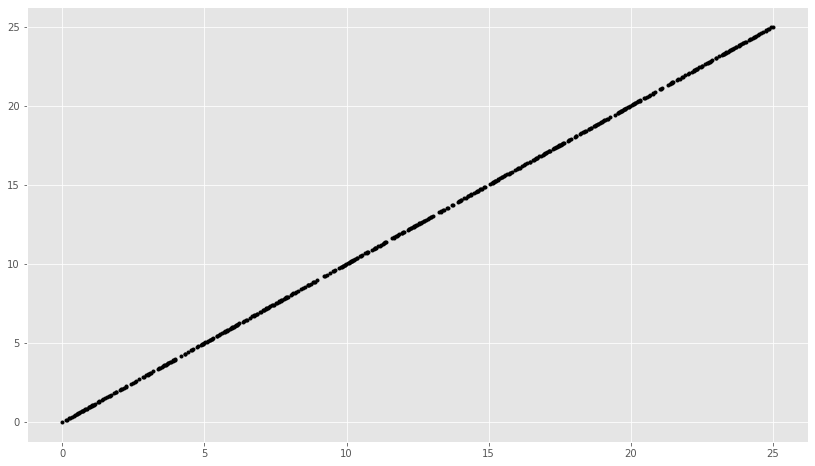

In [32]:
# Plot the values.
plt.plot(X, y, 'k.');

Single linear neuron with different weight and bias

y=2x+1

In [36]:
# Create a new neural network.
m = kr.models.Sequential()
# Add a single neuron in a single layer, initialised with weight 2 and bias 1.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer=kr.initializers.Constant(value=2.0), 
                      bias_initializer=kr.initializers.Constant(value=1.0)))
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [37]:

# Run each x value through the neural network.
y = m.predict(X)

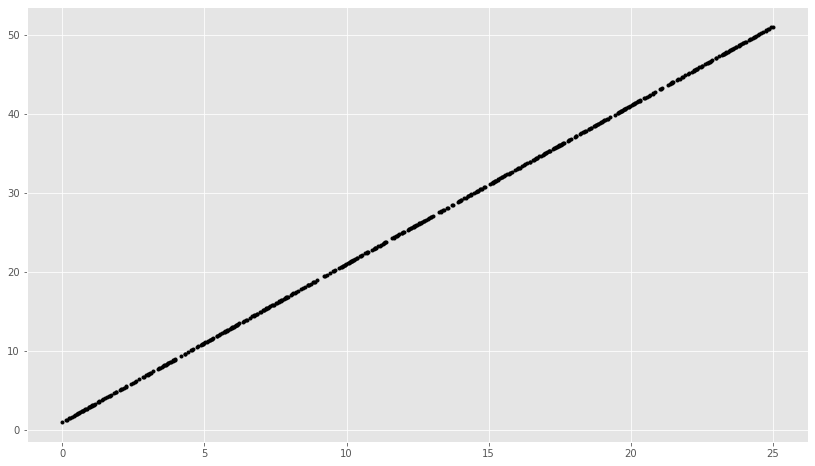

In [38]:
# Plot the values.
plt.plot(X, y, 'k.');

Sigmoid activation

In [39]:
# Create a new neural network.
m = kr.models.Sequential()
# Add a single neuron in a single layer, initialised with weight 1 and bias 0, with sigmoid activation.
m.add(kr.layers.Dense(1, input_dim=1, activation="sigmoid", kernel_initializer=kr.initializers.Constant(value=1.0), 
                      bias_initializer=kr.initializers.Constant(value=0.0)))
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="sgd")

In [40]:
# Create some input values.
#x = np.arange(-10.0, 10.1, 1.0)
# Run each x value through the neural network.
y = m.predict(X)

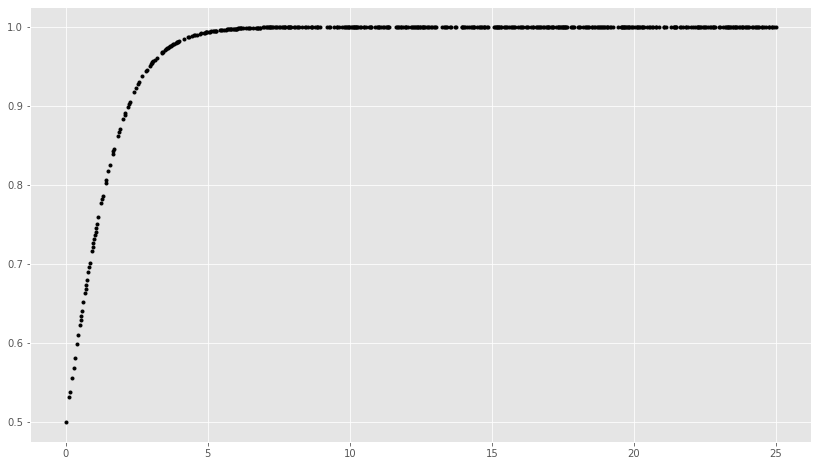

In [41]:
# Plot the values.
plt.plot(X, y, 'k.');